# Train simple baseline models on merged seasons (full) data with historical rolling features

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from src.features.data_engineering import preprocess_seasons_data, reverse_processing

In [10]:
import os
data_intermediate_path = os.path.dirname(os.getcwd()) + '\\data\\intermediate\\'
data_rolling = pd.read_csv(data_intermediate_path + 'data_rolling.csv')

In [11]:
(x_train, y_train), (x_test, y_test), (x_train_target, x_test_target), x_scaler = preprocess_seasons_data(data=data_rolling)

## Train on baseline Dummy model

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [13]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

DummyRegressor()

In [14]:
y_pred = dummy_regr.predict(x_test)

In [15]:
mean_squared_error(y_pred, y_test)

6.229359266000692

## Train on baseline decision tree model

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree_regr = DecisionTreeRegressor()
tree_regr.fit(x_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred = tree_regr.predict(x_test)

In [19]:
mean_squared_error(y_pred, y_test)

9.383581207897054

## Train on baseline SVR model

In [21]:
from sklearn.svm import LinearSVR

In [22]:
model_svr = LinearSVR()
model_svr.fit(x_train, y_train)

d:\studies\informatyka\semestr_3\fpl_ai_manager\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [23]:
# create series to keep indexes and name same as in the original y data
y_pred_svr = pd.Series(model_svr.predict(x_test), index=y_test.index, name='predicted_total_points_next_gameweek')

In [24]:
mean_squared_error(y_pred_svr, y_test)

5.088362033774976

## Merge results with footballers extracted target data

In [25]:
x_test_reversed = reverse_processing(x_test, x_scaler, x_test_target)

In [26]:
predictions_svr = pd.concat([y_pred_svr, x_test_reversed], axis=1)

In [27]:
#preview predictions_svr sorted by predicted total points descending
predictions_svr.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,assists-3,assists-6,assists-all,...,value-all,was_home,yellow_cards,yellow_cards-3,yellow_cards-6,yellow_cards-all,position_DEF,position_FWD,position_GK,position_MID
90610,4.639751,Mohamed Salah,1,254,3.0,2020-21,0.0,0.000000,0.000000,0.000000,...,120.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
120165,3.958624,Mohamed Salah,9,233,5.0,2021-22,1.0,1.000000,0.666667,0.666667,...,126.000000,0.0,0.0,0.000000,0.166667,0.111111,0.0,0.0,0.0,1.0
115301,3.877159,Mohamed Salah,1,233,3.0,2021-22,2.0,2.000000,2.000000,2.000000,...,125.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
123173,3.739169,Mohamed Salah,14,233,6.0,2021-22,0.0,0.333333,0.666667,0.642857,...,127.285714,0.0,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.0,1.0
91186,3.714690,Heung-Min Son,2,390,1.0,2020-21,0.0,0.000000,0.000000,0.000000,...,89.500000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
92563,3.656982,Jack Grealish,4,37,3.0,2020-21,3.0,1.000000,1.000000,1.000000,...,70.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
124201,3.617952,Mohamed Salah,16,233,8.0,2021-22,0.0,0.333333,0.500000,0.625000,...,127.687500,1.0,0.0,0.000000,0.000000,0.062500,0.0,0.0,0.0,1.0
22988,3.432371,Harry_Kane,37,403,17.0,2016-17,1.0,0.333333,0.500000,0.189189,...,111.108108,0.0,0.0,0.000000,0.333333,0.081081,0.0,1.0,0.0,0.0
95887,3.428591,Bruno Miguel Borges Fernandes,10,302,6.0,2020-21,1.0,0.666667,0.500000,0.444444,...,105.555556,0.0,0.0,0.333333,0.166667,0.222222,0.0,0.0,0.0,1.0
115422,3.402839,Mohamed Salah,2,233,10.0,2021-22,0.0,1.000000,1.000000,1.000000,...,125.500000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


### Train baseline MLP model

In [37]:
import tensorflow as tf

In [38]:
model_mlp = tf.keras.models.Sequential()

model_mlp.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model_mlp.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=126, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [39]:
model_mlp.compile(optimizer='adam',
                  loss='mse')

In [40]:
history = model_mlp.fit(x_train, y_train,
                        batch_size=16,
                        epochs=15,
                        validation_split=0.2)

Epoch 1/15
5180/5180 [==============================] - 7s 1ms/step - loss: 4.6221 - val_loss: 4.4995
Epoch 2/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.5553 - val_loss: 4.3841
Epoch 3/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.5370 - val_loss: 4.4401
Epoch 4/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.5224 - val_loss: 4.3817
Epoch 5/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.5083 - val_loss: 4.3931
Epoch 6/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.5057 - val_loss: 4.3667
Epoch 7/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.4999 - val_loss: 4.3662
Epoch 8/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.4976 - val_loss: 4.3755
Epoch 9/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.4896 - val_loss: 4.3579
Epoch 10/15
5180/5180 [==============================] - 6s 1ms/step - loss: 4.479

In [41]:
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 4.450381278991699


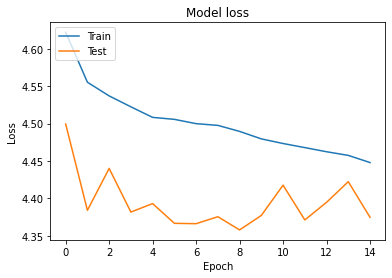

In [42]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [43]:
y_pred_mlp = pd.Series(model_mlp.predict(x_test).reshape(-1,), index=y_test.index, name='predicted_total_points_next_gameweek')

In [46]:
predictions_mlp = pd.concat([y_pred_mlp, x_test_reversed], axis=1)
#preview predictions_mlp_2 sorted by predicted total points descending
predictions_mlp.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,assists-3,assists-6,assists-all,...,value-all,was_home,yellow_cards,yellow_cards-3,yellow_cards-6,yellow_cards-all,position_DEF,position_FWD,position_GK,position_MID
123173,6.741319,Mohamed Salah,14,233,6.0,2021-22,0.0,0.333333,0.666667,0.642857,...,127.285714,0.0,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.0,1.0
120165,6.383359,Mohamed Salah,9,233,5.0,2021-22,1.0,1.000000,0.666667,0.666667,...,126.000000,0.0,0.0,0.000000,0.166667,0.111111,0.0,0.0,0.0,1.0
57658,6.187052,Mohamed_Salah_253,21,253,11.0,2018-19,0.0,0.666667,0.500000,0.380952,...,130.142857,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
82417,6.131968,Heung-Min_Son_342,26,342,0.0,2019-20,0.0,0.000000,0.000000,0.346154,...,97.423077,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
129347,6.091964,Raheem Sterling,25,255,2.0,2021-22,0.0,0.666667,0.333333,0.120000,...,107.120000,0.0,1.0,0.333333,0.166667,0.040000,0.0,0.0,0.0,1.0
51821,5.978864,Mohamed_Salah_253,11,253,8.0,2018-19,0.0,0.666667,0.333333,0.363636,...,129.545455,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
97143,5.972654,Mohamed Salah,12,254,7.0,2020-21,0.0,0.666667,0.333333,0.250000,...,122.250000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
78285,5.967741,Sadio_ManÃ©_192,19,192,11.0,2019-20,1.0,0.666667,0.666667,0.444444,...,118.388889,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.0,1.0
92744,5.950924,Bruno Miguel Borges Fernandes,5,302,3.0,2020-21,1.0,0.666667,0.500000,0.500000,...,105.000000,0.0,0.0,0.333333,0.250000,0.250000,0.0,0.0,0.0,1.0
65699,5.949704,Mohamed_Salah_253,35,253,19.0,2018-19,1.0,0.333333,0.500000,0.314286,...,131.771429,0.0,0.0,0.333333,0.166667,0.028571,0.0,0.0,0.0,1.0


## Train on baseline XGBoost model

In [47]:
import xgboost as xgb

In [48]:
model_xgb = xgb.XGBRegressor()

In [49]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
# create series to keep indexes and name same as in the original y data
y_pred_xgb = pd.Series(model_xgb.predict(x_test), index=y_test.index,
                        name='predicted_total_points_next_gameweek')

In [55]:
predictions_xgb = pd.concat([y_pred_xgb, x_test_reversed], axis=1)
#preview predictions_mlp_2 sorted by predicted total points descending
predictions_xgb.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,assists-3,assists-6,assists-all,...,value-all,was_home,yellow_cards,yellow_cards-3,yellow_cards-6,yellow_cards-all,position_DEF,position_FWD,position_GK,position_MID
37215,11.021213,Mohamed_Salah,24,234,8.0,2017-18,0.0,0.333333,0.666667,0.333333,...,95.666667,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
95887,10.671134,Bruno Miguel Borges Fernandes,10,302,6.0,2020-21,1.0,0.666667,0.500000,0.444444,...,105.555556,0.0,0.0,0.333333,0.166667,0.222222,0.0,0.0,0.0,1.0
23852,10.388957,Wilfried_Zaha,1,126,0.0,2017-18,0.0,0.000000,0.000000,0.000000,...,70.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
8205,9.972853,Christian_Benteke,15,213,2.0,2016-17,0.0,0.333333,0.166667,0.066667,...,75.600000,0.0,0.0,0.333333,0.166667,0.200000,0.0,1.0,0.0,0.0
36532,9.813643,Kevin_De Bruyne,23,252,6.0,2017-18,0.0,0.666667,0.500000,0.478261,...,101.086957,0.0,0.0,0.000000,0.000000,0.043478,0.0,0.0,0.0,1.0
53593,9.368018,Eden_Hazard_122,14,122,5.0,2018-19,1.0,0.333333,0.333333,0.357143,...,109.714286,1.0,0.0,0.333333,0.333333,0.142857,0.0,0.0,0.0,1.0
57658,9.160844,Mohamed_Salah_253,21,253,11.0,2018-19,0.0,0.666667,0.500000,0.380952,...,130.142857,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
28658,9.136830,Kevin_De Bruyne,10,252,10.0,2017-18,0.0,1.000000,0.666667,0.600000,...,99.900000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
110925,9.062270,Chris Wood,33,91,6.0,2020-21,1.0,0.666667,0.500000,0.090909,...,62.515152,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
115334,9.021613,Freddie Woodman,1,513,1.0,2021-22,0.0,0.000000,0.000000,0.000000,...,45.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0


In [51]:
mean_squared_error(y_pred_xgb, y_test)

4.555912158158739

Feature 0: assists, Score: 0.0007800000021234155
Feature 1: assists-3, Score: 0.0017999999690800905
Feature 2: assists-6, Score: 0.0020600000862032175
Feature 3: assists-all, Score: 0.0026700000744313
Feature 4: bonus, Score: 0.0015200000489130616
Feature 5: bonus-3, Score: 0.003109999932348728
Feature 6: bonus-6, Score: 0.0024300001095980406
Feature 7: bonus-all, Score: 0.004100000020116568
Feature 8: bps, Score: 0.0028699999675154686
Feature 9: bps-3, Score: 0.004900000058114529
Feature 10: bps-6, Score: 0.0044999998062849045
Feature 11: bps-all, Score: 0.005429999902844429
Feature 12: clean_sheets, Score: 0.004980000201612711
Feature 13: clean_sheets-3, Score: 0.0031900000758469105
Feature 14: clean_sheets-6, Score: 0.004559999797493219
Feature 15: clean_sheets-all, Score: 0.004310000222176313
Feature 16: creativity, Score: 0.004470000043511391
Feature 17: creativity-3, Score: 0.005890000145882368
Feature 18: creativity-6, Score: 0.004749999847263098
Feature 19: creativity-all, Scor

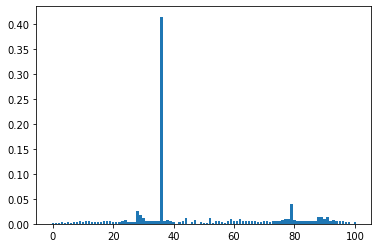

In [52]:
# summarize feature importance
importance = model_xgb.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()